**DATA COLLECTION**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from keras.preprocessing.image import ImageDataGenerator

**Define the parameters/arguments for ImageDataGenertor Class**

In [4]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

**Applying ImageDataGenerator functionality to trainset and testset**

In [5]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [6]:
x_train=train_datagen.flow_from_directory(r'/content/drive/MyDrive/DATASET/DATASET/test',target_size=(64,64),batch_size=32,color_mode='grayscale',class_mode='categorical')
x_test=train_datagen.flow_from_directory(r'/content/drive/MyDrive/DATASET/DATASET/train',target_size=(64,64),batch_size=32,color_mode='grayscale',class_mode='categorical')

Found 30 images belonging to 6 classes.
Found 594 images belonging to 6 classes.


**MODEL BUILDING**

*Importing necessary libraries*

In [7]:
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D

*Initializing The Model*

In [8]:
model=Sequential()

*Adding CNN Layers*

In [9]:
model.add(Conv2D(32,(3,3),input_shape=(64,64,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

*Adding Dense Layer*

In [10]:
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=6,activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

**Configure The Learning Process**

In [12]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

**Train The Model**

In [13]:
model.fit_generator(
    generator=x_train,steps_per_epoch=len(x_train),
    epochs=20,validation_data=x_test,validation_steps=len(x_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/20
1/1 [==============================] - 146s 146s/step - loss: 1.7924 - accuracy: 0.2000 - val_loss: 1.8150 - val_accuracy: 0.2155
Epoch 2/20
1/1 [==============================] - 2s 2s/step - loss: 1.7706 - accuracy: 0.3000 - val_loss: 1.7454 - val_accuracy: 0.2761
Epoch 3/20
1/1 [==============================] - 2s 2s/step - loss: 1.6472 - accuracy: 0.7000 - val_loss: 1.7319 - val_accuracy: 0.2963
Epoch 4/20
1/1 [==============================] - 2s 2s/step - loss: 1.5970 - accuracy: 0.5333 - val_loss: 1.7104 - val_accuracy: 0.2811
Epoch 5/20
1/1 [==============================] - 2s 2s/step - loss: 1.5554 - accuracy: 0.5667 - val_loss: 1.6596 - val_accuracy: 0.3367
Epoch 6/20
1/1 [==============================] - 2s 2s/step - loss: 1.4617 - accuracy: 0.6333 - val_loss: 1.6295 - val_accuracy: 0.3620
Epoch 7/20
1/1 [==============================] - 2s 2s/step - loss: 1.3461 - accuracy: 0.7000 - val_loss: 1.6299 - val_accuracy: 0.3300
Epoch 8/20
1/1 [=====================

**Save The Model**

In [14]:
model.save('gesture.h5')
model_json=model.to_json()
with open("model-bw.json","w") as json_file:
  json_file.write(model_json)

**Test The Model**

In [15]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
test_model=load_model('gesture.h5')

In [29]:
img=image.load_img('/content/drive/MyDrive/DATASET/DATASET/test/1/1.jpg',target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
predict_x=(model.predict(x_test)>0.5).astype("int64")
pred=np.argmax(predict_x,axis=-1)
pred

19/19 [==============================] - 2s 112ms/step


array([0, 2, 3, 3, 3, 0, 2, 0, 2, 2, 5, 0, 1, 0, 2, 2, 1, 2, 5, 0, 4, 5,
       5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 5, 5, 5, 2, 0, 4, 5, 0, 2,
       5, 0, 0, 2, 2, 2, 2, 0, 5, 0, 5, 2, 5, 0, 2, 2, 1, 5, 5, 2, 2, 0,
       2, 2, 2, 5, 5, 5, 5, 5, 3, 0, 0, 0, 0, 5, 5, 2, 2, 0, 2, 5, 5, 0,
       3, 2, 0, 2, 2, 5, 2, 5, 2, 1, 5, 2, 3, 5, 2, 2, 5, 0, 0, 1, 2, 5,
       1, 0, 5, 0, 0, 2, 0, 0, 2, 0, 0, 5, 5, 3, 2, 5, 5, 0, 5, 0, 2, 2,
       0, 2, 5, 5, 5, 0, 4, 0, 5, 2, 5, 0, 2, 2, 5, 0, 5, 3, 2, 2, 2, 5,
       2, 0, 2, 2, 5, 2, 2, 0, 0, 0, 2, 5, 2, 5, 2, 2, 2, 0, 2, 0, 5, 0,
       2, 0, 5, 5, 2, 5, 2, 2, 3, 0, 0, 4, 5, 2, 0, 2, 2, 2, 5, 5, 3, 0,
       2, 5, 3, 0, 5, 2, 0, 2, 5, 3, 5, 0, 1, 0, 2, 2, 3, 2, 5, 5, 5, 2,
       2, 0, 5, 2, 0, 0, 0, 5, 2, 2, 3, 2, 5, 2, 3, 0, 2, 5, 2, 3, 2, 2,
       3, 5, 5, 4, 2, 0, 2, 0, 0, 5, 0, 5, 2, 2, 0, 2, 5, 5, 5, 4, 2, 0,
       2, 0, 5, 2, 5, 3, 5, 0, 2, 2, 2, 5, 5, 2, 2, 5, 5, 0, 2, 5, 2, 5,
       5, 0, 2, 2, 5, 0, 5, 2, 5, 0, 2, 2, 4, 0, 5,

In [23]:
img=image.load_img('/content/drive/MyDrive/DATASET/DATASET/test/5/0.jpg',target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
predict_x=model.predict(x_test)
classes_x=np.argmax(predict_x,axis=1)
classes_x
predict_x

19/19 [==============================] - 2s 113ms/step


array([[3.63650324e-05, 1.00673385e-01, 8.84924829e-01, 9.27196909e-03,
        2.19488959e-03, 2.89856945e-03],
       [1.09729765e-04, 6.09397963e-02, 8.96766007e-01, 1.42396037e-02,
        1.71308201e-02, 1.08139990e-02],
       [9.10579634e-04, 4.29182090e-02, 5.15802264e-01, 3.14076841e-01,
        6.87084198e-02, 5.75836748e-02],
       ...,
       [1.13933806e-04, 4.84528864e-04, 3.30845662e-03, 9.36015010e-01,
        4.24098596e-02, 1.76681578e-02],
       [9.91293371e-01, 6.63017039e-04, 4.79599075e-05, 3.76093225e-03,
        1.05844589e-03, 3.17617063e-03],
       [9.86273953e-05, 2.10130867e-02, 4.58884448e-01, 4.73550670e-02,
        2.86796633e-02, 4.43969071e-01]], dtype=float32)

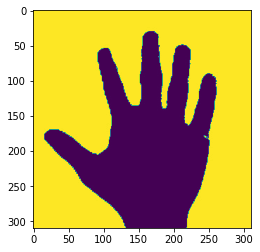

In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/drive/MyDrive/DATASET/DATASET/test/5/0.jpg')
imgplot=plt.imshow(img)
plt.show()

In [22]:
imgload=image.load_img('/content/drive/MyDrive/DATASET/DATASET/test/5/0.jpg',color_mode='grayscale',target_size=(64,64))
res=image.img_to_array(imgload)
res.shape

(64, 64, 1)

In [24]:
type(res)

numpy.ndarray

In [25]:
res=np.expand_dims(res,axis=0)
res.shape

(1, 64, 64, 1)

**Predict the result**

In [26]:
pred_res=np.argmax(test_model.predict(res),axis=-1)
pred_res

1/1 [==============================] - 0s 157ms/step


array([5])

In [27]:
index=['0','1','2','3','4','5']
result=str(index[pred_res[0]])
result

'5'